# **Visualization of White-box methods - Lab. practice**

### **1. Linear Regression**




In [ ]:
import pandas as pd, numpy as np

from sklearn import datasets 

### **1.1 Diabetes data set** [description](https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset)

Note: All features have been standardized

In [ ]:
data = datasets.load_diabetes()

X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

### **1.2 Dataset overview**

In [ ]:
X.describe()

age           sex           bmi            bp            s1  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean  -3.639623e-16  1.309912e-16 -8.013951e-16  1.289818e-16 -9.042540e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.072256e-01 -4.464164e-02 -9.027530e-02 -1.123996e-01 -1.267807e-01   
25%   -3.729927e-02 -4.464164e-02 -3.422907e-02 -3.665645e-02 -3.424784e-02   
50%    5.383060e-03 -4.464164e-02 -7.283766e-03 -5.670611e-03 -4.320866e-03   
75%    3.807591e-02  5.068012e-02  3.124802e-02  3.564384e-02  2.835801e-02   
max    1.107267e-01  5.068012e-02  1.705552e-01  1.320442e-01  1.539137e-01   

                 s2            s3            s4            s5            s6  
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  
mean   1.301121e-16 -4.563971e-16  3.863174e-16 -3.848103e-16 -3.398488e-16  
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  
min   -1.156131e-01 -1.023071e-01 -7.639450e-02 -1.260974e-01 -1.377672e-01  
25%   -3.035840e-02 -3.511716e-02 -3.949338e-02 -3.324879e-02 -3.317903e-02  
50%   -3.819065e-03 -6.584468e-03 -2.592262e-03 -1.947634e-03 -1.077698e-03  
75%    2.984439e-02  2.931150e-02  3.430886e-02  3.243323e-02  2.791705e-02  
max    1.987880e-01  1.811791e-01  1.852344e-01  1.335990e-01  1.356118e-01

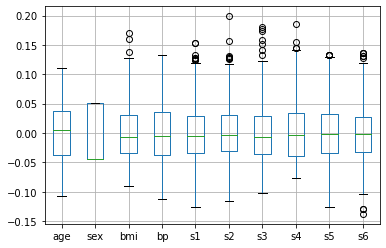

In [ ]:
X.boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdbd5b2a520>]],
      dtype=object)

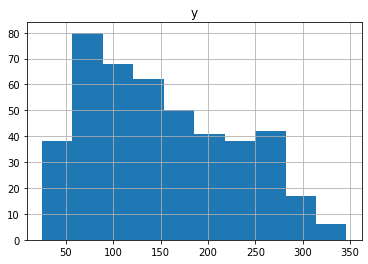

In [ ]:
y_aux = pd.DataFrame(data.target, columns=["y"])

y_aux.hist()

## **1.3 notebookJS**


### **Library definition**

1.   [GitHub](https://github.com/jorgehpo/notebookJS)

### **Examples of applications**

1.   [Calibrate](https://ieeexplore.ieee.org/abstract/document/9904444)
2.   [PipelineProfiler](https://ieeexplore.ieee.org/abstract/document/9222086)
3. [xHiPP](https://ieeexplore.ieee.org/abstract/document/8614350)



In [ ]:
!pip install notebookjs
from notebookjs import execute_js

In [ ]:
from google.colab import drive

drive.mount("/content/drive")

Mounted at /content/drive


Note: If you are on Google Colab, run the previous cell. Remember using the correct path to load the next files. 

In [ ]:
code_js  = open("/content/drive/MyDrive/Colab Notebooks/vis02.js", "r").read()
code_css = open("/content/drive/MyDrive/Colab Notebooks/vis01.css", "r").read()

In [ ]:
import random

def python_callback( data ):

  global b
  b = data

  return {'n': random.random(), 'y': 'VisML' }

*Note: take a look at [Component Object Model](https://en.wikipedia.org/wiki/Component_Object_Model) (COM)*

In [ ]:
d3_path = "https://d3js.org/d3.v7.min.js"

data = list(X["bmi"].to_numpy())

execute_js(library_list=[d3_path, code_js], 
           main_function="draw_boxplot", 
           css_list=[code_css],
           data_dict={"data": data},
           callbacks={'python_callback': python_callback})

In [ ]:
data = list(y)

execute_js(library_list=[d3_path, code_js], 
           main_function="draw_histogram", 
           css_list=[code_css],
           data_dict={"data": data})

## **1.4 Linear Model**

In [ ]:
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error, r2_score

In [ ]:
reg = linear_model.LinearRegression()

reg.fit(X, y)

pd.DataFrame(data=reg.coef_.reshape(1,-1), columns=X.columns)

age         sex         bmi          bp          s1          s2  \
0 -10.012198 -239.819089  519.839787  324.390428 -792.184162  476.745838   

          s3          s4          s5         s6  
0  101.04457  177.064176  751.279321  67.625386

In [ ]:
y_pred = reg.predict(X)

mae = mean_absolute_error(y, y_pred)
r2  = r2_score(y, y_pred)

print("R2:   {:.2f}".format(r2))
print("MAE: {:.2f}".format(mae))

R2:   0.52
MAE: 43.28


In [ ]:
execute_js(library_list=[d3_path, code_js], 
           main_function="draw_regression", 
           css_list=[code_css],
           data_dict={"y": list(y), "y_pred": list(y_pred), "coef": list(reg.coef_)})